## The perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

## Regression MLPs

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [3]:
rmse

0.5053326657968193

## Building an Image Classifier Using the Sequential API

### Using Keras to load the dataset

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

2023-05-01 10:41:38.742996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [6]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Ankle boot'

### Creating the model using the sequential API

In [9]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2023-05-01 10:41:47.643044: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden1 = model.get_layer("dense")
hidden1.name

'dense'

In [12]:
weights, bias = hidden1.get_weights()
weights, bias

(array([[ 0.06157993,  0.03114682, -0.05446967, ...,  0.00643999,
         -0.06393588,  0.03535878],
        [ 0.02293637, -0.07352413, -0.06413954, ..., -0.07322049,
         -0.02953046,  0.04377167],
        [ 0.0438589 , -0.01840214,  0.06612615, ...,  0.02857341,
         -0.04676044, -0.01149543],
        ...,
        [-0.05169893,  0.01851638,  0.03459327, ...,  0.06555972,
         -0.00465033,  0.06841421],
        [ 0.00319178, -0.01195145,  0.03829769, ...,  0.05107613,
          0.01017376, -0.07392061],
        [-0.00684069, -0.02259881, -0.03332987, ...,  0.00429263,
         -0.06735121,  0.0316902 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [13]:
weights.shape

(784, 300)

In [14]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
bias.shape

(300,)

### compiling the model

In [16]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.2080 - sparse_categorical_accuracy: 0.1837 - val_loss: 2.0325 - val_sparse_categorical_accuracy: 0.3324
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.9266 - sparse_categorical_accuracy: 0.4080 - val_loss: 1.8047 - val_sparse_categorical_accuracy: 0.5046
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 1.7274 - sparse_categorical_accuracy: 0.5430 - val_loss: 1.6240 - val_sparse_categorical_accuracy: 0.6000
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.5657 - sparse_categorical_accuracy: 0.6062 - val_loss: 1.4755 - val_sparse_categorical_accuracy: 0.6390
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4323 - sparse_categorical_accuracy: 0.6363 - val_loss: 1.3538 - val_sparse_categorical_accuracy: 0.6590
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3221 - spars

<AxesSubplot: >

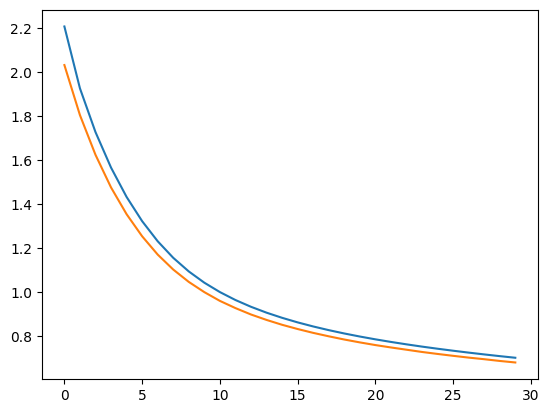

In [18]:
import seaborn as sns

sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])

<AxesSubplot: >

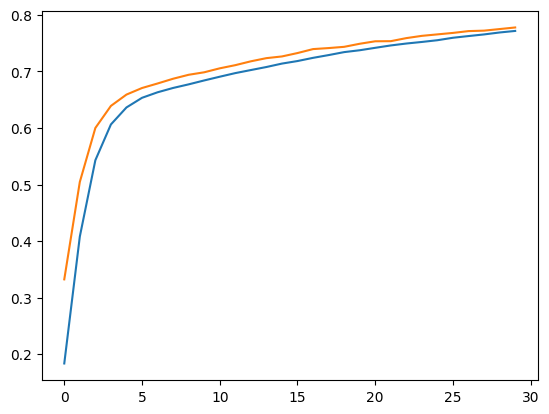

In [19]:
sns.lineplot(history.history['sparse_categorical_accuracy'])
sns.lineplot(history.history['val_sparse_categorical_accuracy'])

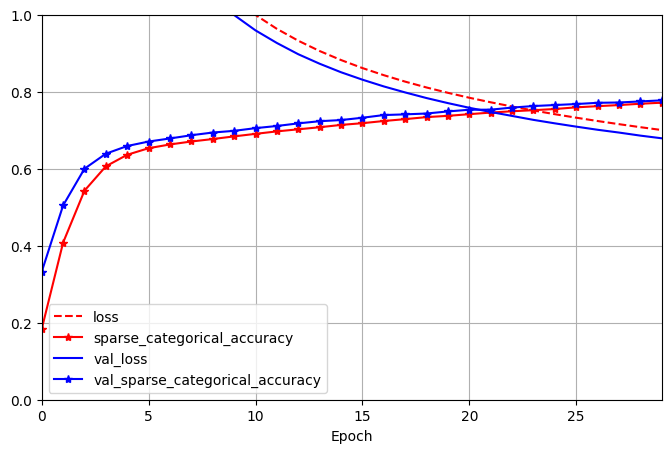

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r-*", "b-", "b-*"]
)
plt.show()

### Using the model to make predictions

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 75ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.21, 0.05, 0.43],
       [0.  , 0.  , 0.7 , 0.  , 0.09, 0.  , 0.2 , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
import numpy as np

y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [25]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [26]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

norm_layer.adapt(X_train)

In [28]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7885 - root_mean_squared_error: 0.8880 - val_loss: 0.3855 - val_root_mean_squared_error: 0.6209
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3680 - root_mean_squared_error: 0.6066 - val_loss: 1.8179 - val_root_mean_squared_error: 1.3483
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3595 - root_mean_squared_error: 0.5996 - val_loss: 0.3555 - val_root_mean_squared_error: 0.5962
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3393 - root_mean_squared_error: 0.5825 - val_loss: 1.0784 - val_root_mean_squared_error: 1.0385
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3281 - root_mean_squared_error: 0.5728 - val_loss: 1.0356 - val_root_mean_squared_error: 1.0177
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3170 - root_mean_squared_error: 0.5630 - val_loss: 0.2901 - val_

<AxesSubplot: >

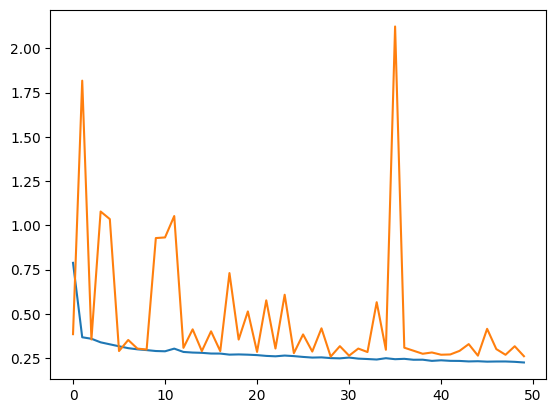

In [29]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])

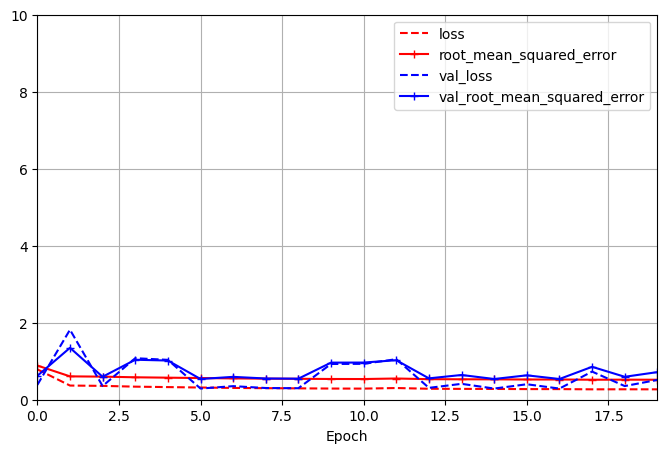

In [30]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 19],
    ylim=[0, 10],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r-+", "b--", "b-+"]
)
plt.show()

In [31]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
mse_test, rmse_test

162/162 [==============================] - 0s 778us/step - loss: 0.2731 - root_mean_squared_error: 0.5226


(0.27308133244514465, 0.522571861743927)

In [32]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[0.53420097],
       [1.1860175 ],
       [4.7588983 ]], dtype=float32)

In [33]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

## Building Complex Models Using the Functional API

In [34]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer_1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer_2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden_1 = hidden_layer_1(normalized)
hidden_2 = hidden_layer_2(hidden_1)
concat = concat_layer([normalized, hidden_2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

norm_layer.adapt(X_train)

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 399349.2812 - root_mean_squared_error: 631.9409 - val_loss: 162766.3750 - val_root_mean_squared_error: 403.4431
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 54854.1680 - root_mean_squared_error: 234.2097 - val_loss: 17921.6523 - val_root_mean_squared_error: 133.8718
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 6296.4893 - root_mean_squared_error: 79.3504 - val_loss: 4554.1143 - val_root_mean_squared_error: 67.4842
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 2970.5488 - root_mean_squared_error: 54.5027 - val_loss: 3301.6624 - val_root_mean_squared_error: 57.4601
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 1569.7684 - root_mean_squared_error: 39.6203 - val_loss: 1168.4697 - val_root_mean_squared_error: 34.1829
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 315.2107 - root_

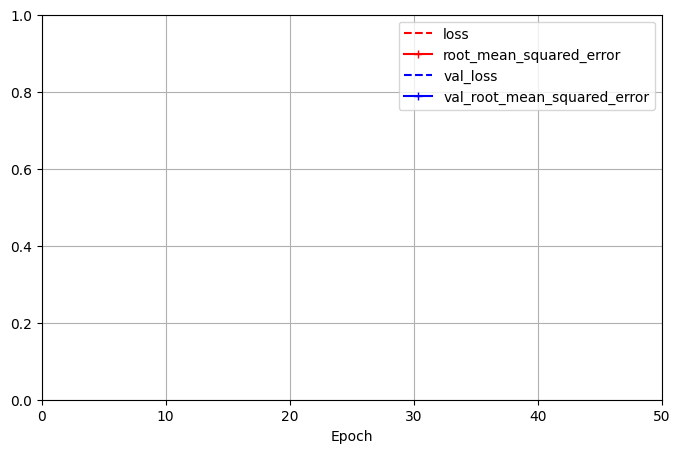

In [36]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 50],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r-+", "b--", "b-+"]
)
plt.show()

In [37]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
mse_test, rmse_test

162/162 [==============================] - 0s 736us/step - loss: 1.5721 - root_mean_squared_error: 1.2538


(1.5721226930618286, 1.2538431882858276)

In [38]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred, y_test[:3]

1/1 [==============================] - 0s 46ms/step


(array([[0.8420747],
        [1.5278429],
        [4.746677 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

In [39]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden_1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden_2 = tf.keras.layers.Dense(30, activation="relu")(hidden_1)
concat = tf.keras.layers.Concatenate()([norm_wide, hidden_2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), y_train,
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid)
)
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
print("mse test:", mse_test)

y_pred = model.predict((X_new_wide, X_new_deep))
print("pred:", y_pred, y_test[:3])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3780 - root_mean_squared_error: 1.1739 - val_loss: 1.2349 - val_root_mean_squared_error: 1.1112
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5232 - root_mean_squared_error: 0.7233 - val_loss: 3.7272 - val_root_mean_squared_error: 1.9306
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4791 - root_mean_squared_error: 0.6922 - val_loss: 0.7709 - val_root_mean_squared_error: 0.8780
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4083 - root_mean_squared_error: 0.6390 - val_loss: 0.7865 - val_root_mean_squared_error: 0.8868
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3946 - root_mean_squared_error: 0.6281 - val_loss: 2.6691 - val_root_mean_squared_error: 1.6337
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3967 - root_mean_squared_error: 0.6298 - val_loss: 3.5908 - val_

### Using the Subclassing API to Build Dynamic Models

In [40]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        
        self.hidden_1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden_2 = tf.keras.layers.Dense(units, activation=activation)
        
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        
        hidden_1 = self.hidden_1(norm_deep)
        hidden_2 = self.hidden_2(hidden_1)
        
        concat = tf.keras.layers.concatenate([norm_wide, hidden_2])
        
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden_2)
        
        return output, aux_output

tf.random.set_seed(42)
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [41]:
X_train_wide.shape, X_train_deep.shape

((11610, 5), (11610, 6))

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss="mse",
    loss_weights=(0.9, 0.1),
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

model.norm_layer_deep.adapt(X_train_deep)
model.norm_layer_wide.adapt(X_train_wide)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), 
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 1.7249 - output_1_loss: 1.6659 - output_2_loss: 2.2556 - output_1_root_mean_squared_error: 1.2907 - output_2_root_mean_squared_error: 1.5019 - val_loss: 0.7775 - val_output_1_loss: 0.5908 - val_output_2_loss: 2.4578 - val_output_1_root_mean_squared_error: 0.7687 - val_output_2_root_mean_squared_error: 1.5678
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5423 - output_1_loss: 0.5256 - output_2_loss: 0.6929 - output_1_root_mean_squared_error: 0.7250 - output_2_root_mean_squared_error: 0.8324 - val_loss: 3.2522 - val_output_1_loss: 3.3644 - val_output_2_loss: 2.2420 - val_output_1_root_mean_squared_error: 1.8342 - val_output_2_root_mean_squared_error: 1.4973
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - output_1_loss: 0.4750 - output_2_loss: 0.5792 - output_1_root_mean_squared_error: 0.6892 - output_2_root_mean_squared_error: 0.7610 - val_loss: 0.508

In [43]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
print(weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse)

162/162 [==============================] - 0s 930us/step - loss: 0.3585 - output_1_loss: 0.3513 - output_2_loss: 0.4226 - output_1_root_mean_squared_error: 0.5927 - output_2_root_mean_squared_error: 0.6500
0.358467698097229 0.35134655237197876 0.4225592017173767 0.5927449464797974 0.6500455141067505


In [44]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main, y_pred_aux

1/1 [==============================] - 0s 58ms/step


(array([[0.4537172],
        [1.5481731],
        [3.619273 ]], dtype=float32),
 array([[0.67031693],
        [1.6935211 ],
        [3.549484  ]], dtype=float32))

In [45]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

### Saving and Restoring a Model

In [46]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [47]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main, y_pred_aux

1/1 [==============================] - 0s 59ms/step


(array([[0.4537173],
        [1.5481728],
        [3.6192727]], dtype=float32),
 array([[0.67031693],
        [1.6935211 ],
        [3.549484  ]], dtype=float32))

### Using callbacks

In [48]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_checkpoints",
    save_weights_only=True
)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), 
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3707 - output_1_loss: 0.3634 - output_2_loss: 0.4363 - output_1_root_mean_squared_error: 0.6028 - output_2_root_mean_squared_error: 0.6605 - val_loss: 0.3540 - val_output_1_loss: 0.3439 - val_output_2_loss: 0.4453 - val_output_1_root_mean_squared_error: 0.5864 - val_output_2_root_mean_squared_error: 0.6673
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3519 - output_1_loss: 0.3454 - output_2_loss: 0.4109 - output_1_root_mean_squared_error: 0.5877 - output_2_root_mean_squared_error: 0.6410 - val_loss: 0.7888 - val_output_1_loss: 0.7399 - val_output_2_loss: 1.2283 - val_output_1_root_mean_squared_error: 0.8602 - val_output_2_root_mean_squared_error: 1.1083
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3511 - output_1_loss: 0.3443 - output_2_loss: 0.4120 - output_1_root_mean_squared_error: 0.5868 - output_2_root_mean_squared_error: 0.6419 - val_loss: 0.461

In [49]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_checkpoints",
    save_weights_only=True
)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), 
    epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3320 - output_1_loss: 0.3260 - output_2_loss: 0.3863 - output_1_root_mean_squared_error: 0.5710 - output_2_root_mean_squared_error: 0.6215 - val_loss: 0.6457 - val_output_1_loss: 0.6679 - val_output_2_loss: 0.4462 - val_output_1_root_mean_squared_error: 0.8173 - val_output_2_root_mean_squared_error: 0.6679
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3355 - output_1_loss: 0.3297 - output_2_loss: 0.3869 - output_1_root_mean_squared_error: 0.5742 - output_2_root_mean_squared_error: 0.6220 - val_loss: 1.2765 - val_output_1_loss: 1.2474 - val_output_2_loss: 1.5386 - val_output_1_root_mean_squared_error: 1.1169 - val_output_2_root_mean_squared_error: 1.2404
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3422 - output_1_loss: 0.3369 - output_2_loss: 0.3893 - output_1_root_mean_squared_error: 0.5804 - output_2_root_mean_squared_error: 0.6239 - val_loss: 0.

<AxesSubplot: >

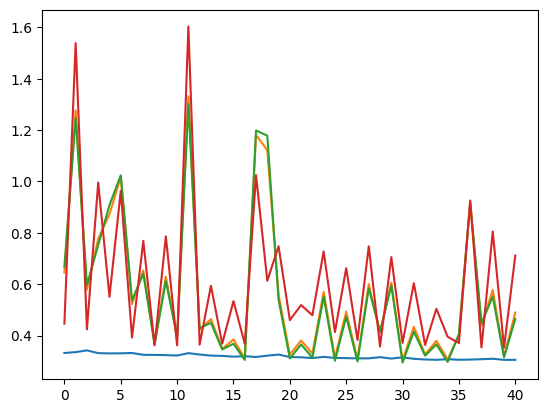

In [50]:
sns.lineplot(history.history["loss"])
sns.lineplot(history.history["val_loss"])
sns.lineplot(history.history["val_output_1_loss"])
sns.lineplot(history.history["val_output_2_loss"])

In [51]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"\n*** Epoch={epoch}, val/train={ratio:.2f} \n")

In [52]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), 
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb]
)

Epoch 1/10
358/363 [============================>.] - ETA: 0s - loss: 0.3071 - output_1_loss: 0.3020 - output_2_loss: 0.3528 - output_1_root_mean_squared_error: 0.5496 - output_2_root_mean_squared_error: 0.5940
*** Epoch=0, val/train=1.01 

363/363 [==============================] - 1s 2ms/step - loss: 0.3076 - output_1_loss: 0.3025 - output_2_loss: 0.3536 - output_1_root_mean_squared_error: 0.5500 - output_2_root_mean_squared_error: 0.5946 - val_loss: 0.3109 - val_output_1_loss: 0.2992 - val_output_2_loss: 0.4164 - val_output_1_root_mean_squared_error: 0.5470 - val_output_2_root_mean_squared_error: 0.6453
Epoch 2/10
354/363 [============================>.] - ETA: 0s - loss: 0.3103 - output_1_loss: 0.3053 - output_2_loss: 0.3551 - output_1_root_mean_squared_error: 0.5525 - output_2_root_mean_squared_error: 0.5959
*** Epoch=1, val/train=1.60 

363/363 [==============================] - 1s 1ms/step - loss: 0.3092 - output_1_loss: 0.3042 - output_2_loss: 0.3541 - output_1_root_mean_square

### Using TensorBoard for Visualization

In [53]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
run_logdir

PosixPath('my_logs/run_2023_05_01_10_47_15')

In [54]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    run_logdir,
    profile_batch=(100, 200)
)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), 
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb]
)

Epoch 1/10
 92/363 [======>.......................] - ETA: 0s - loss: 0.2933 - output_1_loss: 0.2890 - output_2_loss: 0.3317 - output_1_root_mean_squared_error: 0.5376 - output_2_root_mean_squared_error: 0.5760

2023-05-01 10:47:15.503647: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-01 10:47:15.503659: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-01 10:47:15.504086: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


253/363 [===================>..........] - ETA: 0s - loss: 0.3022 - output_1_loss: 0.2975 - output_2_loss: 0.3446 - output_1_root_mean_squared_error: 0.5454 - output_2_root_mean_squared_error: 0.5870

2023-05-01 10:47:15.707357: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-01 10:47:15.707372: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-01 10:47:15.826688: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-05-01 10:47:15.837170: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-01 10:47:15.839688: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: my_logs/run_2023_05_01_10_47_15/plugins/profile/2023_05_01_10_47_15/Mael-FOSSO.local.xplane.pb


363/363 [==============================] - 1s 2ms/step - loss: 0.3028 - output_1_loss: 0.2979 - output_2_loss: 0.3470 - output_1_root_mean_squared_error: 0.5458 - output_2_root_mean_squared_error: 0.5891 - val_loss: 0.3289 - val_output_1_loss: 0.3265 - val_output_2_loss: 0.3506 - val_output_1_root_mean_squared_error: 0.5714 - val_output_2_root_mean_squared_error: 0.5921
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3057 - output_1_loss: 0.3010 - output_2_loss: 0.3475 - output_1_root_mean_squared_error: 0.5487 - output_2_root_mean_squared_error: 0.5895 - val_loss: 0.4620 - val_output_1_loss: 0.4472 - val_output_2_loss: 0.5956 - val_output_1_root_mean_squared_error: 0.6687 - val_output_2_root_mean_squared_error: 0.7717
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3034 - output_1_loss: 0.2987 - output_2_loss: 0.3459 - output_1_root_mean_squared_error: 0.5465 - output_2_root_mean_squared_error: 0.5882 - val_loss: 0.3090 - val_out

In [55]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    get_run_logdir(),
    profile_batch=(100, 200)
)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    loss="mse",
    loss_weights=(0.9, 0.1),
    optimizer=optimizer,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), 
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb]
)

Epoch 1/10


2023-05-01 10:47:21.071511: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-01 10:47:21.071522: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-01 10:47:21.071829: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


200/363 [===============>..............] - ETA: 0s - loss: 0.4888 - output_1_loss: 0.4771 - output_2_loss: 0.5946 - output_1_root_mean_squared_error: 0.6907 - output_2_root_mean_squared_error: 0.7711

2023-05-01 10:47:21.980769: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-01 10:47:21.980784: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-01 10:47:22.141694: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-05-01 10:47:22.163571: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-01 10:47:22.164110: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: my_logs/run_2023_05_01_10_47_21/plugins/profile/2023_05_01_10_47_22/Mael-FOSSO.local.xplane.pb


363/363 [==============================] - 1s 2ms/step - loss: 0.4488 - output_1_loss: 0.4385 - output_2_loss: 0.5420 - output_1_root_mean_squared_error: 0.6622 - output_2_root_mean_squared_error: 0.7362 - val_loss: 0.3682 - val_output_1_loss: 0.3566 - val_output_2_loss: 0.4722 - val_output_1_root_mean_squared_error: 0.5972 - val_output_2_root_mean_squared_error: 0.6872
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3733 - output_1_loss: 0.3665 - output_2_loss: 0.4343 - output_1_root_mean_squared_error: 0.6054 - output_2_root_mean_squared_error: 0.6590 - val_loss: 0.8575 - val_output_1_loss: 0.8349 - val_output_2_loss: 1.0615 - val_output_1_root_mean_squared_error: 0.9137 - val_output_2_root_mean_squared_error: 1.0303
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3742 - output_1_loss: 0.3676 - output_2_loss: 0.4340 - output_1_root_mean_squared_error: 0.6063 - output_2_root_mean_squared_error: 0.6588 - val_loss: 0.6430 - val_out

In [56]:
%load_ext tensorboard

In [57]:
!python3 -m tensorboard.main --logdir=./my_logs

/usr/local/opt/python@3.11/bin/python3.11: Error while finding module specification for 'tensorboard.main' (ModuleNotFoundError: No module named 'tensorboard')


## Fine-Tuning NEural Network Hyperparameters

In [58]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [59]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [60]:
import keras_tuner as kt

In [61]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="relu"))
    model.compile(
        loss="sparse_categorical_crossentropy", # tf.keras.losses.sparse_categorical_crossentropy,
        optimizer=optimizer,
        metrics=["accuracy"], #[tf.keras.metrics.Accuracy()]
    )
    
    return model

In [62]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,))

In [63]:
random_search_tunner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_fashion_mnist",
    project_name="my_rnd_search",
    seed=42
)

random_search_tunner.search(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid)
)

Trial 5 Complete [00h 00m 29s]
val_accuracy: 0.2313999980688095

Best val_accuracy So Far: 0.2313999980688095
Total elapsed time: 00h 02m 36s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [64]:
top3_models = random_search_tunner.get_best_models(num_models=3)
top3_models

In [65]:
best_model = top3_models[0]
best_model

In [66]:
top3_params = random_search_tunner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 5,
 'n_neurons': 70,
 'learning_rate': 0.00041268008323824807,
 'optimizer': 'sgd'}

In [67]:
best_trial = random_search_tunner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 4 summary
Hyperparameters:
n_hidden: 5
n_neurons: 70
learning_rate: 0.00041268008323824807
optimizer: sgd
Score: 0.2313999980688095


# Exercises

In [87]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [88]:
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]

In [89]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,))

In [90]:
x_train, x_valid, x_test = x_train/255.0, x_valid/255.0, x_test/255.0

In [130]:
from IPython.display import clear_output

class PlotLogDuringTrainingCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            
        print(self.metrics)
            
    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
                
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15, 5))
        clear_output(wait=True)
        
        for i, metric in enumerate(metrics):
            axs[i].plot(
                range(1, epoch + 2),
                self.metrics[metric],
                label=metric
            )
            
            if logs['val_' + metric]:
                axs[i].plot(
                    range(1, epoch + 2),
                    self.metrics['val_' + metric],
                    label='val_' + metric
                )
                
            axs[i].legend()
            axs[i].grid()
        
        plt.tight_layout()
        plt.show()

In [129]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


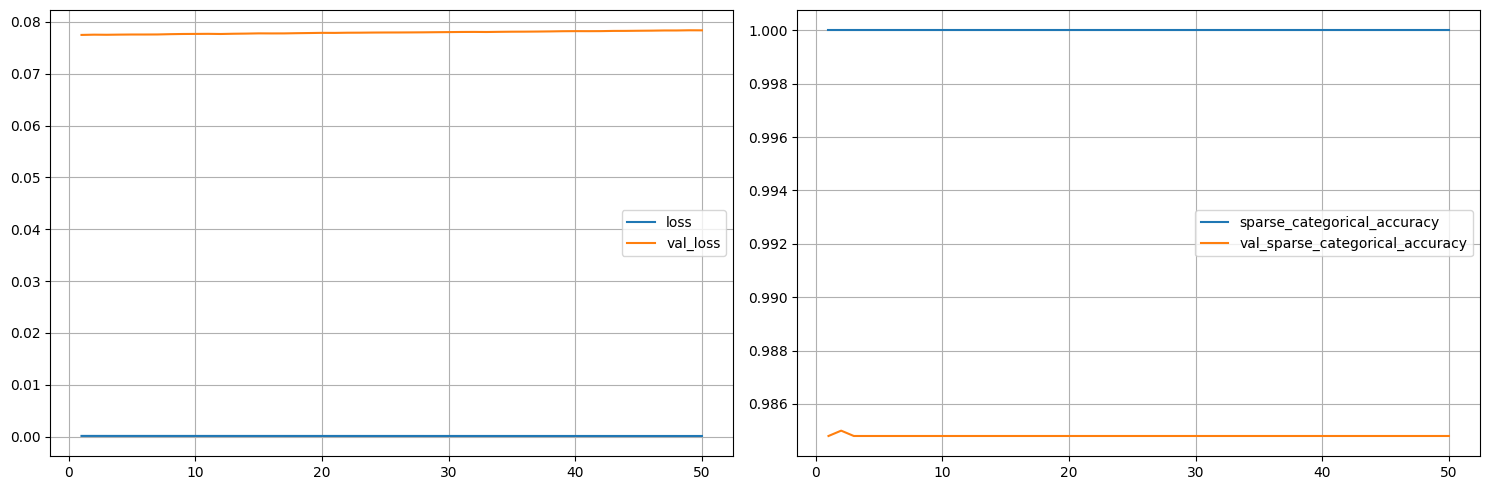

1719/1719 [==============================] - 6s 3ms/step - loss: 1.1707e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0784 - val_sparse_categorical_accuracy: 0.9848


In [132]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    validation_data=(x_valid, y_valid),
    callbacks=[PlotLogDuringTrainingCallback()]
)

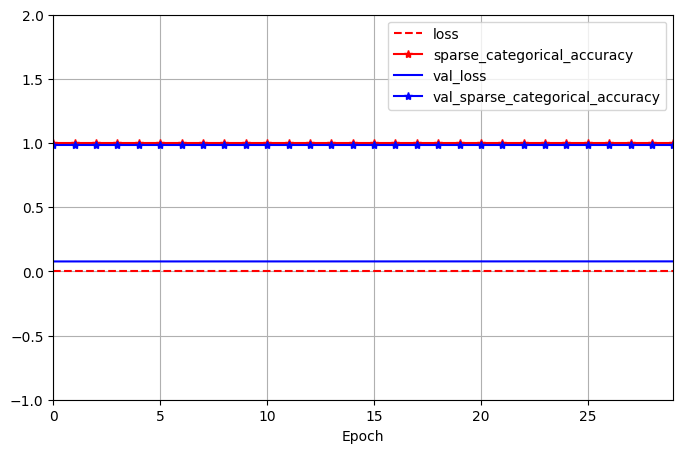

In [133]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[-1, 2],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r-*", "b-", "b-*"]
)
plt.show()

In [107]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0821 - sparse_categorical_accuracy: 0.9811


[0.08207842707633972, 0.9811000227928162]

In [134]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9828


[0.07592116296291351, 0.9828000068664551]